<a href="https://colab.research.google.com/github/ev1025/DA_Study/blob/main/SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치

**설치**
1. Bitnami WAMP 검색하여 설치(찾아봐야함) Window에서 Apach, Mysql, PHP 한번에 설치해주는 파일    
- 설치url : https://bitnami.com/redirect/to/1449638/bitnami-wampstack-8.0.3-2-windows-x64-installer.exe?bypassauth=false&fb=1&with_popup_skip_signin=1
2. 오른쪽 로컬인스톨 맨위
3. root 비밀번호설정(다중 사용프로그램)
4. cloud with Bitnami 체크 해제, 설치
5. Bitnami WAMP에서 Manage Severs탭에 MySQL이 초록색이어야 실행됨   
- 출처 https://opentutorials.org/course/3161/19532

**실행**
1. cmd에서 C:\Bitnami\wampstack-버전\mysql\bin (탭눌러서 선택하면됨)
2. mysql -uroot -p
3. root 패스워드 입력

**버전8 root 비밀번호 초기화**
1. MySQL 중지
2. C드라이브에 밑의 내용으로 mysql-init.txt파일 생성
   - ALTER USER 'root'@'localhost' IDENTIFIED BY '비밀번호';
3. cmd를 관리자권한으로 실행한 뒤 밑에 명령어 입력(MySQL을 명령어로 실행시키고, 비밀번호 변경)
   - mysql경로\\mysqld --defaults-file="파일경로\\my.ini" --init-file=C:\mysql-init.txt
   - 예시 : mysqld --defaults-file="C:\\Bitnami\\wampstack-8.0.3-2\\mysql\\my.ini" --init-file=C:\\mysql-init.txt

4. 새 cmd로 MySQL 실행하여 비밀번호 잘 바뀌었는지 확인

- 공식문서 https://dev.mysql.com/doc/refman/8.0/en/resetting-permissions.html
- 유튜브 https://www.youtube.com/watch?v=aUpsnwG7zOQ&t=167s



# SQL 레벨업

**데이터 캐시** 
- 데이터의 일부를 메모리에 유지하기 위해 사용하는 메모리영역
- 휘발성이라 장애발생시 휘발됨

**로그버퍼** 
- 갱신처리에 사용되는 메모리영역
- 메모리에서 값 변경 후, commit으로 디스크의 값을 갱신처리(비동기 : 바로 처리되지 않고 후처리)
- 도중에 장애 발생 시 처리되지 않을 수 있기 때문에 로그파일에 기록하여 장애가 유발되어도 정합성을 유지

**데이터캐시에 비해 로그 버퍼의 초깃값은 낮다**
- 트랜잭션(가장 작은 작업단위)이 대부분 검색이기 때문에 검색에 사용하는 데이터캐시에 높은 초깃값 할당
- 갱신업무가 많은 트랜잭션인 경우 성능을 위해 로그버퍼의 초깃값을 올려줘야한다.

**SQL쿼리 실행 방법**
1. 파서가 구문을 분석
2. 옵티마이저가 플랜생성, 비용평가
3. 카탈로그매니저가 통계정보를 옵티마이저에 제공
4. 실행계획(옵티마이저가 찾은 최종 계획) ->실행계획이 SQL의 성능을 좌우한다.


In [ ]:
# 통계정보 갱신 명령어(Mysql)
ANALYZE 스키마.테이블

**SQL구문의 성능이 낮을 때 확인 절차**

In [ ]:
#  실행계획 확인 방법
EXPLAIN EXTENDED
[SQL구문]

**결합 알고리즘 종류**
1. **Nested Loops(중첩반복)** : 한쪽의 테이블을 읽으면서 결합조건에 맞는 다른 테이블을 찾는 방법(이중중첩쿼리)

2. **Sort Merge** : 원칙적으로 결합 전 정렬을 해야하며 결합키로 레코드를 정렬하고 순차적으로 결합(워킹메모리 사용)

3. **Hash** : 결합 키 값을 해시값으로 매핑(해시테이블 생성을 위해 워킹메모리 사용)

**VIEW : 자주 사용하는 SQL 구문을 저장**

In [ ]:
# VIEW 저장
CREATE VIEW [뷰이름] ([필드1],[필드2]...) # 뷰이름, 필드는 내가 지정하고싶은 이름으로 (필드1 = address값, 필드2 = COUNT(*)값)
AS
SELECT address, COUNT(*)
FROM ADDRESS
GROUP BY address;

In [ ]:
# VIEW 구문 불러오기
SELECT [필드1], [필드2]
FROM [뷰이름];

## **이중중첩(Subquery)**
- FROM 구에 직접 지정한 SELECT문

**CASE 조건식**
- 주로 SELECT구에서의 조건분기로 사용

In [ ]:
# 검색 케이스식
CASE WHEN [조건] THEN [식]
     WHEN [조건] THEN [식]
     ELSE [식]
END

In [ ]:
# 라벨링
# 이름, 주소, 지역 정보(case문으로 생성)을 나타내는 테이블
SELECT name, address,
    CASE WHEN address ='서울시' THEN '서울'
         WHEN address ='포천시' THEN '경기'
         WHEN address ='대구시' THEN '경상도'
         ELSE NULL END AS 지역
FROM Address;

In [ ]:
# 두개의 컬럼을 조건에 따라 선택하여 라벨링(2001 이전자료는 세전금액컬럼으로, 2002이후자료는 세후금액 컬럼으로 채우기)
SELECT name, year, 
       CASE WHEN year <= 2001 THEN 세전금액
            WHEN year >= 2002 THEN 세후금액 END AS price
FROM Items

In [ ]:
SELECT emp_name,
       CASE WHEN COUNT(team) = 1 THEN team
            WHEN COUNT(team) = 2 THEN '2개를 겸무'
            WHEN COUNT(team) = 3 THEN '3개 이상을 겸무' END AS team
FROM Employees
GROUP BY emp_name

**집합연산**


- UNION(합집합)
   - 중복을 제거한 테이블 병합
   - 필드의 수가 같을 때만 쓸 수 있다.
   - 중복을 제거하고 싶지 않다면 UNION ALL 사용

- INTERSECT(교집합)
  - 중복된 값만 표시
- EXCEPT(차집합)
  - 중복된 값만 제거
  - 교환법칙이 성립되지 않으므로 앞뒤 순서에 유의

- UNION이 필요한 경우
   1. 다른 테이블에서 데이터를 받아오는 경우
   2. 좋은 인덱스가 존재할 때(CREATE INDEX) => 테이블 Full스캔과 인덱스를 사용한 검색 중 무엇이 더 빠른지 생각해봐야함

In [ ]:
SELECT *
    FROM Address
UNION or INTERSECT or EXCEPT# 집합 코드
SELECT *
    FROM Address2; 

**윈도우 함수**
- SELECT구문의 집약함수 뒤에 OVER를 작성하고 내부에 ORDER BY나 PARTITION BY를 입력
- 종류 : SUM(), COUNT(), RANK(), ROW_NUMBER(), RANGE(), ROWS() 등..

In [ ]:
# PARTITION BY 
# GROUP BY에서 나누기만 하고 합치지 않는 것(레코드의 개수만큼 출력값이 나옴)
SELECT address,
       COUNT(*) OVER (PARTITION BY address)
FROM Address;

# =>
# address | count
# 속초시  |   1
# 인천시  |   2
# 인천시  |   2
# 포천시  |   3 
# 포천시  |   3 
# 포천시  |   3 

In [ ]:
# 윈도우함수 ORDER BY 예시
SELECT name, age,
       RANK() OVER (ORDER BY age DESC) as rnk
FROM Address;

## 집약과 자르기

**합쳐서 하나(p.146)**
- 레코드별로 퍼져있는 자료를 하나로 뭉치는 집약

In [14]:
import sqlite3
import pandas as pd

con = sqlite3.connect(':memory:')
cursor = con.cursor()
cursor.execute('''DROP TABLE IF EXISTS PriceByAge''')
cursor.execute('''CREATE TABLE PriceByAge(product_id VARCHAR(32) NOT NULL,
                low_age INTEGER NOT NULL,
                high_age INTEGER NOT NULL,
                price INTEGER NOT NULL,
                PRIMARY KEY (product_id, low_age),
                CHECK(low_age < high_age));''')

cursor.execute('''INSERT INTO PriceByAge Values("제품1", 0, 50 ,2000),("제품1", 51,100, 3000),("제품2",0,100,4200),("제품3",0,20,500),("제품3",31,70,800),("제품3",71,100,1000),("제품4",0,99,8900)''')
con.commit
# con.close()

# 원본데이터베이스 
raw_sql = 'select * from PriceByAge'
raw_ans = pd.read_sql(raw_sql, con=con)
print('원본데이터\n', raw_ans)

# 연령이 누락되지 않는 제품만뽑기
sql = 'select product_id FROM PriceByAge Group by product_id Having sum(high_age - low_age + 1) =101;'
ans = pd.read_sql(sql,con=con)
print('뽑은결과\n',ans)

원본데이터
   product_id  low_age  high_age  price
0        제품1        0        50   2000
1        제품1       51       100   3000
2        제품2        0       100   4200
3        제품3        0        20    500
4        제품3       31        70    800
5        제품3       71       100   1000
6        제품4        0        99   8900
뽑은결과
   product_id
0        제품1
1        제품2


**소요날짜에 적용할 수 있음**

In [52]:
cursor.execute('''DROP TABLE IF EXISTS HOTEL''')
cursor.execute('''CREATE TABLE HOTEL(
    roomnum INTEGER,
    start_date DATE,
    end_date DATE,
    PRIMARY KEY(roomnum, start_date));
''')
cursor.execute('''INSERT INTO HOTEL VALUES (101, 20080201, 20080206),(101, 20080206, 20080208),(101,20080208,20080213),
(202, 20080201, 20080202), (202, 20080202,20080204), 
(303, 20080201,20080212)
''')
con.commit()

# sql = 'select * from hotel'
sql = 'SELECT roomnum, sum(end_date - start_date) FROM HOTEL GROUP BY roomnum HAVING SUM(end_date - start_date) >=10'
ans = pd.read_sql(sql,con=con)
ans

,roomnum,sum(end_date - start_date)
0,101,12
1,303,11


# MySQL

- 생활코딩 참고 : https://opentutorials.org/course/3161

- Table : 데이터를 저장하는 표
- Database : 연관된 테이블을 모아놓은 것
- Schema : 데이터베이스에서 테이블이 구성되는 방식과 서로 다른 엔티티 간의 관계를 표현
   - 엔티티(Entity) : 테이블
   - 필드(Field) : 열(Column)
   - 레코드(Record) : 행(Row)

- 데이터 캐시를 효율적으로 유지하고자 LRU 알고리즘 사용
- LRU : 가장 오래 참조되지 않은 페이지 제거(FIFO같은 알고리즘 중 하나라고 보면됨)

In [ ]:
# mysql monitor
mysql -u유저이름 # -u는 사용자를 뜻함 root는 관리자권한
mysql -u유저이름 -p비밀번호 # -p는 비밀번호
mysql -uroot -p -h서버주소 # -h서버주소에 접속(안쓰면 자동으로 localhost)

## 데이터베이스

In [ ]:
# 데이터베이스 만들기
CREATE DATABASE 데이터베이스명;

# 데이터베이스 삭제
DROP DATABASE [IF EXISTS] 데이터베이스명; 
# 데이터베이스 확인
SHOW DATABASES;

# 데이터베이스 변경
USE 데이터베이스명

# 현재 사용중인 DB 확인
SELECT database();

## 테이블

- **AUTO_INCREMENT** : 추가할 때 마다 자동으로 1씩 증가하도록 설정
- **VARCHAR와 CHAR의 차이** : VAR는 변동이있음
- **DATA와 DATATIME** : 시간까지 표시하는지 여부
- **NOW()** : 현재 날짜표시
- **IF EXISTS** : 존재하지 않더라도 오류 발생하지 않기 
- **DISTINCT** : 중복불가

[**데이터 타입**](https://www.techonthenet.com/mysql/datatypes.php)
- numeric(n, m) : n은 소수점 앞 최대 개수, m은 소수점 뒤 최대 개수(남는 자리는 패딩처리) 
- real : 소수점 아래 6개까지
- double : 소수점 아래 15개 까지
- date 타입은 2008년 2월 1일이면 20080201로 입력

In [ ]:
# 테이블 확인
SHOW TABLES;

# 테이블 생성
CREATE TABLE topic(
    -> id INT(11) NOT NULL AUTO_INCREMENT,
    -> title VARCHAR(100) NOT NULL,
    -> description TEXT NULL,
    -> created DATETIME NOT NULL,
    -> author VARCHAR(30) NULL,
    -> profile VARCHAR(100) NULL,
    -> PRIMARY KEY(id));
# ERROR 1820 -> MYSQL에서 제공하는 ROOT비밀번호를 사용하고있는데, 다른거로 바꿔라
# SET PASSWORD = PASSWORD('비번');  -> MYSQL 로그인 할 때 비밀번호 바꾸는 명령어

# 테이블 제거
DROP TABLE 테이블

# 테이블명 변경
RENAME TABLE 테이블명 TO 새이름

# 특정 테이블 정보 조회
DESC 테이블명;

# 컬럼 추가
ALTER TABLE 테이블명 ADD 컬럼명 컬럼타입 DEFAULT 기본값;
ALTER TABLE 테이블명 ADD COLUMN 컬럼명 컬럼타입 DEFAULT 기본값 AFTER 앞컬럼; # 앞컬럼 뒤에 추가
ALTER TABLE 테이블명 ADD COLUMN 컬럼명 컬럼타입 DEFAULT FIRST; # 첫번째에 추가

# 컬럼 삭제
ALTER TABLE 테이블명 DROP COLUMN 컬럼명;

# 컬럼명 변경
ALTER TABLE 테이블명 CHANGE 이름 새이름 컬럼타입;


# 컬럼 순서변경
ALTER TABLE 테이블명 MODIFY 뒤컬럼 컬럼타입 AFTER 앞컬럼;

# 컬럼 타입변경
ALTER TABLE 테이블명 MODIFY 컬럼명 타입;

# 컬럼 기본값 변경(기존에 입력된 값은 변하지 않음)
ALTER TABLE 테이블명 ALTER COLUMN 컬럼명 SET DEFAULT 디폴트값;

In [ ]:
# CREATE
INSERT INTO 테이블명 (컬럼1, 컬럼2) VALUES (값1,값2),(값3, 값4), (값5, 값6); # AUTO_INCREMENT는 자동으로 채워지므로 안써도 됨

In [ ]:
# READ
SELECT 컬럼 FROM 테이블명 WHERE 컬럼 조건 GROUP BY 컬럼 ORDER BY 컬럼 DESC HAVING 조건;

# WHERE = 조건
SELECT 컬럼 FROM 테이블명 WHERE 컬럼 = '값'; 

SELECT 컬럼 FROM 테이블명 WHERE 컬럼 ='A' OR 컬럼 ='B' OR 컬럼 =  'C'  
SELECT 컬럼 FROM 테이블명 WHERE 컬럼 IN ('A','B','C') # IN 뒤에 (SELECT문)도 받을 수 있음

SELECT 컬럼 FROM 테이블명 WHERE 컬럼 IS NULL     # 컬럼의 결측치
SELECT 컬럼 FROM 테이블명 WHERE 컬럼 IS NOT NULL # 컬럼의 비결측치

# ORDER BY = 정렬
SELECT 컬럼 FROM 테이블명  ORDERBY 컬럼 DESC; # 내림차순

# HAVING = 생성 된 집합에서의 조건
SELECT 컬럼 FROM 테이블명 WHERE 컬럼 IS NOT NULL HAVING 컬럼>2

# LIMIT 숫자  몇개만 보여줄건지
# OFFSET 시작 인덱스

In [ ]:
# ROWNUM
# 인덱스 번호 생성(정렬x)
SELECT ROWNUM, t.*
FROM [테이블] t

# 필드순으로 정렬된 인덱스 번호 생성(서브쿼리)
SELECT ROWNUM, t.*
FROM (SELECT t1.* 
      FROM [테이블] t1
      ORDER BY t1.[필드]) AS t

In [ ]:
# ROW_NUMBER()
# 인덱스 번호 생성(필드1, 필드2를 기준으로)
SELECT ROW_NUMBER() OVER (ORDER BY t.[필드1] t.[필드2]) AS row_num,
       t.*
FROM [테이블] AS t

# 인덱스번호 따로 (필드1이 1인 값들 중에 필드2의 순서정렬 => 필드1이 2인 값들중에 필드2의 순서정렬 ....)
SELECT ROW_NUMBER() OVER (PARTITION BY t.[필드1] ORDER BY t.[필드1], t.[필드2]) AS row_num,
       t.*
FROM [테이블] AS t

In [ ]:
# RANK() : 같은 값이면 건너뜀(공동3등 다음은 5등) => 1등, 2등, 3등(2명), 5등 ...
# DENSE_RANK() : 같은 값일 때 건너뛰지 않음(공동3등 다음은 4등) => 1등, 2등, 3등(2명), 4등 ...
SELECT name, age,
       RANK() OVER (ORDER BY age DESC) AS rnk
FROM Address;

In [ ]:
# UPDATE where문 꼭 써야함
# 컬럼1이 '값'인  레코드의 컬럼2와 컬럼3를 변경
UPDATE [테이블명]
SET [컬럼2]='변경할내용', [컬럼3]='변경할내용' 
WHERE [컬럼1]='값';

In [ ]:
# DELETE where문 꼭 써야함
DELETE FROM 테이블 
WHERE 조건;

## 관계형 데이터베이스(RDB)

In [ ]:
# LEFT JOIN

SELECT * FROM 테이블1 LEFT JOIN 테이블2 ON 테이블1.교컬럼 = 테이블2.교컬럼;
>>> 테이블1 + 테이블2

SELECT * FROM topic LEFT JOIN author ON topic.author_id=author.id;

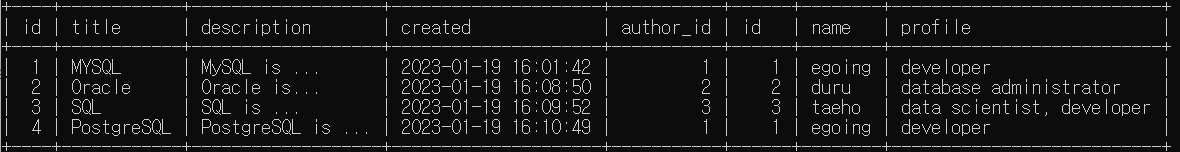

## csv파일 import 오류

**unhandled exception: 'cp949' codec can't decode byte**   
- 해결방법 : csv를 json으로 변경
- https://csvjson.com/csv2json 이용하거나 밑에 코드 이용

In [ ]:
# csv to json 파일 생성
import csv
import json

data = []
with open('data.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    data = list(reader)

with open('data.json', 'w') as json_file:
    json.dump(data, json_file)

In [ ]:
# json변경 후 변수에 저장
import csv
import json

data = []
with open('data.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    data = list(reader)

json_data = json.dumps(data)
print(json_data)

## Pymysql

참고 : https://han.gl/PqLeG

In [ ]:
pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.2 MB/s eta 0:00:00


In [ ]:
import pymysql

# mysql 연결자 생성
conn = pymysql.connect(host='127.0.0.1',   # db주소
                       user='root',        # db유저아이디
                       password='s10e534', # db비밀번호
                       db='opentutorials', # db이름
                       charset='utf8')     # 한글설정
# conn = pymysql.connect(':memory:') # 메모리에 저장
# conn = pymysql.connect('test.db')  # 폴더에 데이터베이스 생성
cur = conn.cursor() # 커서 생성

cur.execute("CREATE TABLE userTable (id char(4), userName char(15), email char(20), birthYear int)")
cur.execute('INSERT INTO userTable values("hong","홍지윤","hang@naver.com",1992)')
conn.commit() # 입력한 데이터를 업데이트하기
conn.close()  # mysql 연결 종료하기